- Start Date: 2018-08-31
- End Date: 2024-08-31
- Area: Colorado

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [9]:
df = pd.read_pickle('Datasets/real_estate_co.pkl')
df

,RegionName,StateName,observed_rent_index,home_value_index,median_sale_price,median_list_price
19,Denver,CO,"[1559.232583100959, 1564.717568726074, 1569.22...","[405575.9924841779, 406922.8904254876, 407910....","[412759.0, 411471.0, 411636.0, 410467.0, 41170...","[453300.0, 450000.0, 448333.0, 445833.0, 44550..."
78,Colorado Springs,CO,"[1335.4430557607943, 1340.570161360893, 1341.5...","[302831.03362379904, 304860.16758029134, 30631...","[286617.0, 287688.0, 289116.0, 289883.0, 28959...","[335000.0, 331667.0, 330000.0, 330000.0, 33166..."
148,Fort Collins,CO,"[1442.3116670040386, 1446.6637350605274, 1454....","[392014.6606747012, 393332.8100245893, 394216....","[385320.0, 384338.0, 382852.0, 380739.0, 38088...","[424967.0, 424467.0, 424467.0, 422800.0, 42096..."
152,Boulder,CO,"[1757.3600722214474, 1759.5802858785166, 1767....","[523262.463351821, 524841.5972632162, 526519.1...","[546498.0, 550460.0, 563523.0, 563182.0, 56340...","[617650.0, 608317.0, 600000.0, 599967.0, 60996..."
157,Greeley,CO,"[1368.1778735474606, 1387.1230235959138, 1394....","[352771.1129270129, 354311.6651858562, 355712....","[325738.0, 326167.0, 329923.0, 335054.0, 33863...","[354065.0, 359065.0, 361483.0, 362500.0, 36250..."
253,Pueblo,CO,"[836.3498670228539, 843.8516447962819, 845.586...","[177095.9273324609, 178663.1524001904, 179774....","[172840.0, 169994.0, 167019.0, 165915.0, 15973...","[234500.0, 234483.0, 232483.0, 232900.0, 23121..."
268,Grand Junction,CO,"[1009.1179296343132, 1009.0196476132064, 1016....","[247764.8285489817, 249786.5646608963, 251421....","[229680.0, 229031.0, 230660.0, 232317.0, 23743...","[279100.0, 279167.0, 283367.0, 292233.0, 29730..."
423,Glenwood Springs,CO,"[2344.5397368650483, 2353.272430546569, 2327.5...","[526669.6679267199, 528997.8565583624, 530969....","[410451.0, 401031.0, 430105.0, 438737.0, 44157...","[773667.0, 811333.0, 823000.0, 821000.0, 85050..."
492,Edwards,CO,"[800.8970950302808, 801.8689031880194, 801.759...","[690418.1446963669, 695250.6717727525, 699491....","[710294.0, 732906.0, 720761.0, 713950.0, 68978...","[1157317.0, 1172317.0, 1188983.0, 1213000.0, 1..."
493,Durango,CO,"[781.3709370595712, 782.1325718965629, 781.856...","[411771.92700623145, 412668.2535083229, 413080...","[396533.0, 410350.0, 412132.0, 420261.0, 42684...","[519800.0, 511800.0, 511633.0, 519983.0, 52331..."


In [10]:
def create_date_range(start='2018-08-31', end='2024-08-31', freq='M'):
    """Create a date range for the time series data"""
    return pd.date_range(start=start, end=end, freq=freq)

def plot_region_metrics(df, region_name, date_range):
    """
    Plot all metrics for a specific region over time
    """
    plt.figure(figsize=(15, 8))
    
    # Get the data for the specific region
    region_data = df[df['RegionName'] == region_name]
    
    # Plot each metric
    metrics = ['home_value_index', 'median_sale_price', 'median_list_price']
    for metric in metrics:
        plt.plot(date_range, region_data[metric].iloc[0], 
                label=metric.replace('_', ' ').title(),
                marker='o', markersize=4)
    
    plt.title(f'Real Estate Metrics Over Time - {region_name}')
    plt.xlabel('Date')
    plt.ylabel('Value ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

def plot_metric_comparison(df, metric, top_n=5, date_range=None):
    """
    Plot comparison of a specific metric across top N regions
    """
    plt.figure(figsize=(15, 8))
    
    # Calculate the mean value for each region to find top N
    region_means = []
    for _, row in df.iterrows():
        mean_value = np.mean(row[metric])
        region_means.append((row['RegionName'], mean_value))
    
    # Sort and get top N regions
    top_regions = sorted(region_means, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Plot each region
    for region, _ in top_regions:
        region_data = df[df['RegionName'] == region][metric].iloc[0]
        plt.plot(date_range, region_data, label=region, marker='o', markersize=4)
    
    plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Top {top_n} Regions')
    plt.xlabel('Date')
    plt.ylabel('Value ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

def calculate_growth_rates(df, metric, date_range):
    """
    Calculate and visualize growth rates for each region
    """
    growth_rates = []
    
    for _, row in df.iterrows():
        initial_value = row[metric][0]
        final_value = row[metric][-1]
        growth_rate = ((final_value - initial_value) / initial_value) * 100
        growth_rates.append((row['RegionName'], growth_rate))
    
    # Sort by growth rate
    growth_rates.sort(key=lambda x: x[1], reverse=True)
    
    # Create bar plot
    plt.figure(figsize=(15, 8))
    regions, rates = zip(*growth_rates)
    plt.bar(regions, rates)
    plt.title(f'Total Growth Rate in {metric.replace("_", " ").title()} by Region')
    plt.xlabel('Region')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    return plt

def create_heatmap(df, metric, date_range):
    """
    Create a heatmap showing the metric values across regions and time
    """
    # Prepare data for heatmap
    heatmap_data = []
    for _, row in df.iterrows():
        heatmap_data.append(row[metric])
    
    heatmap_df = pd.DataFrame(heatmap_data, 
                             index=df['RegionName'],
                             columns=date_range)
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_df, cmap='YlOrRd', 
                xticklabels=12,  # Show every 12th month
                yticklabels=True)
    plt.title(f'{metric.replace("_", " ").title()} Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Region')
    plt.tight_layout()
    return plt

/var/folders/y_/b1tvl6l53p3_kgr4vjlhss9w0000gn/T/ipykernel_1780/3917889305.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return pd.date_range(start=start, end=end, freq=freq)


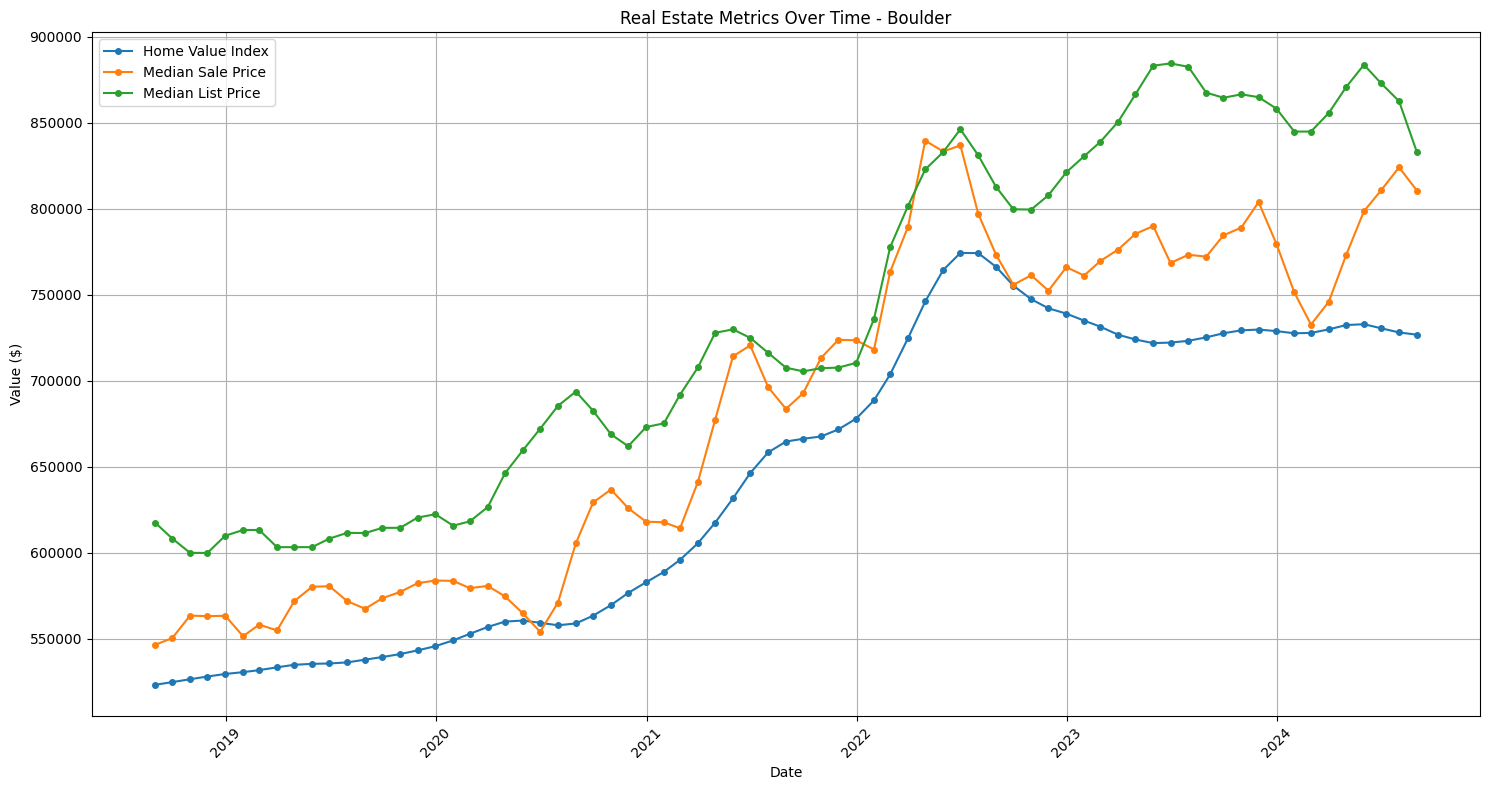

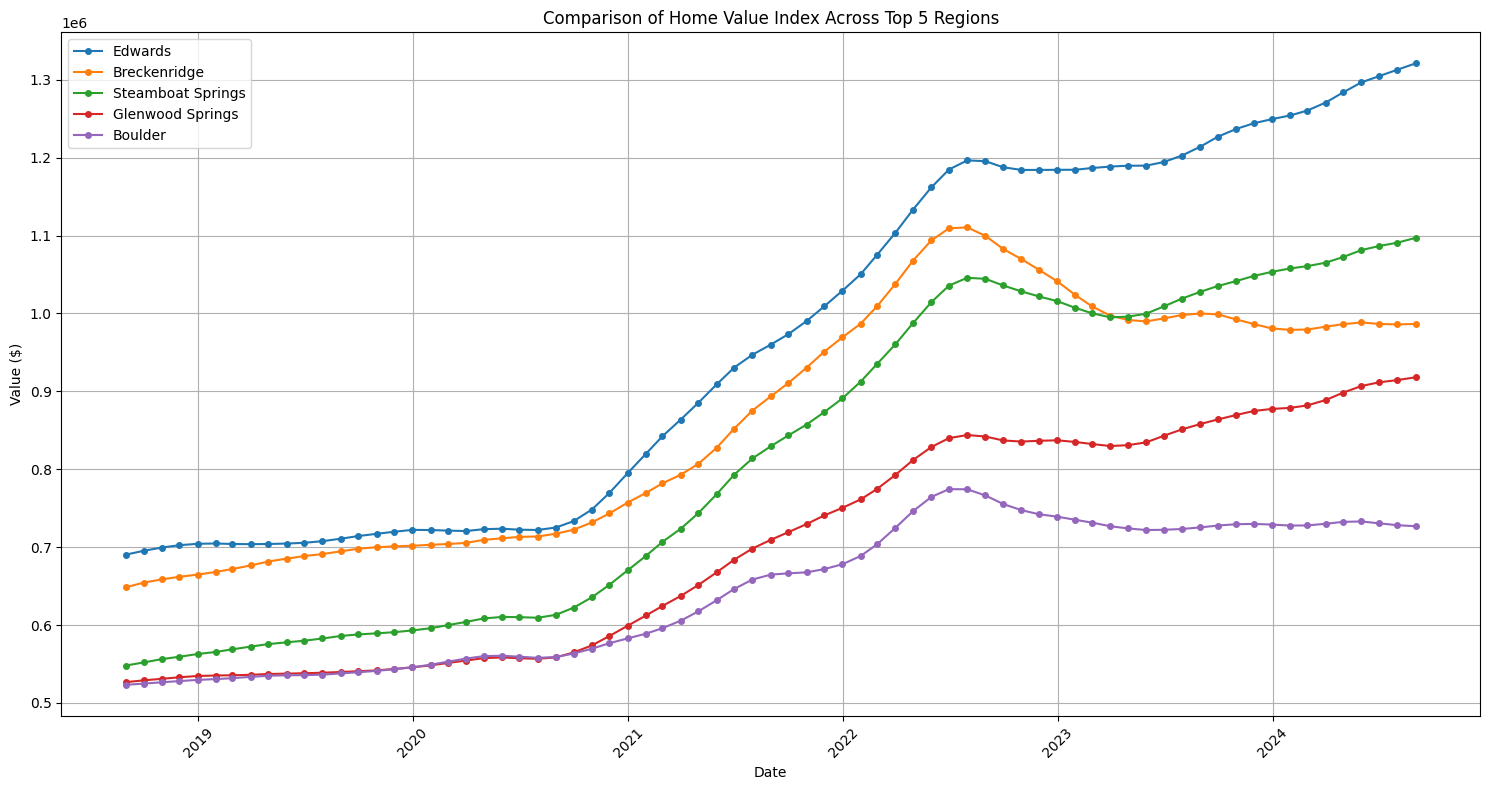

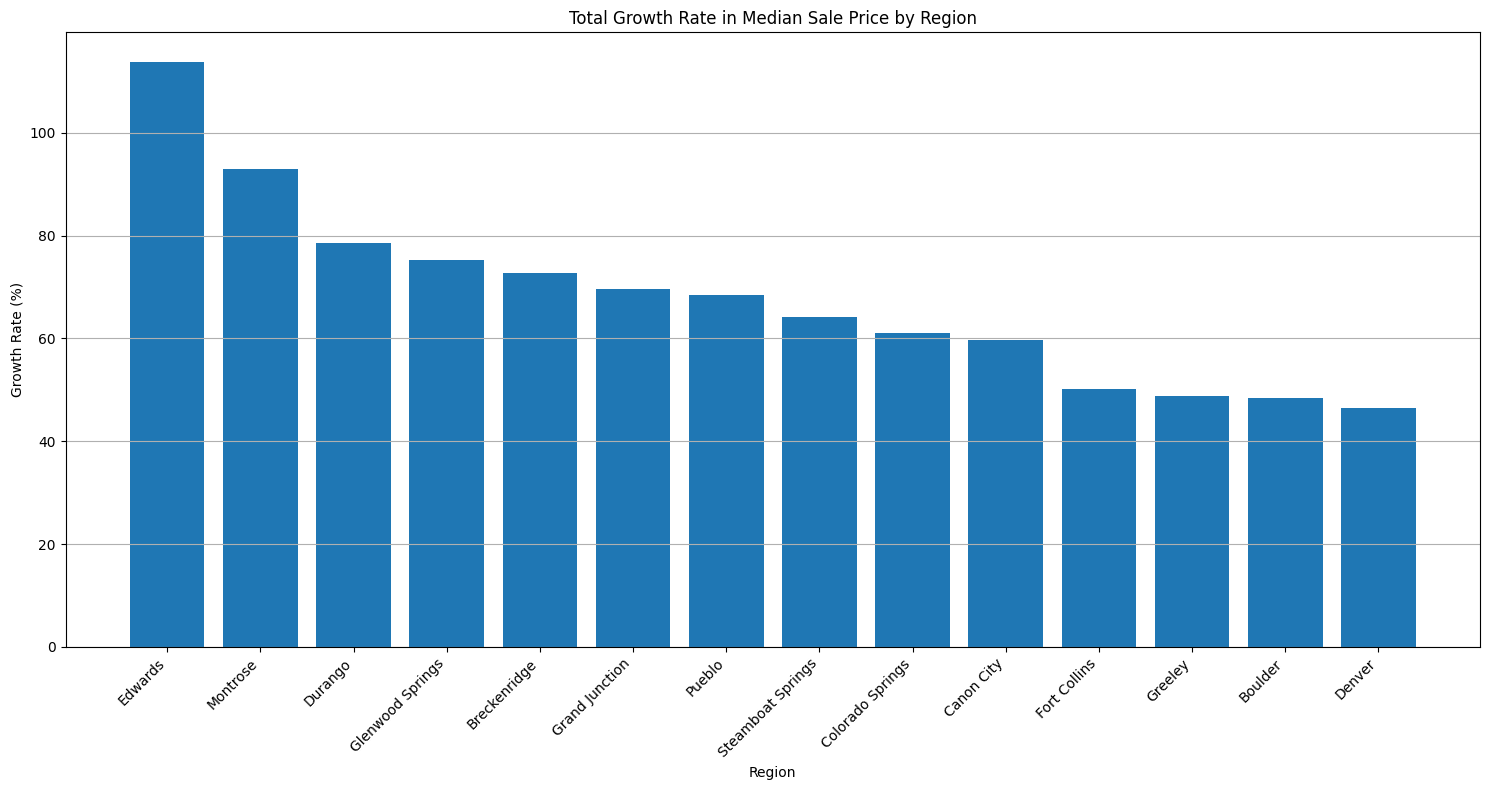

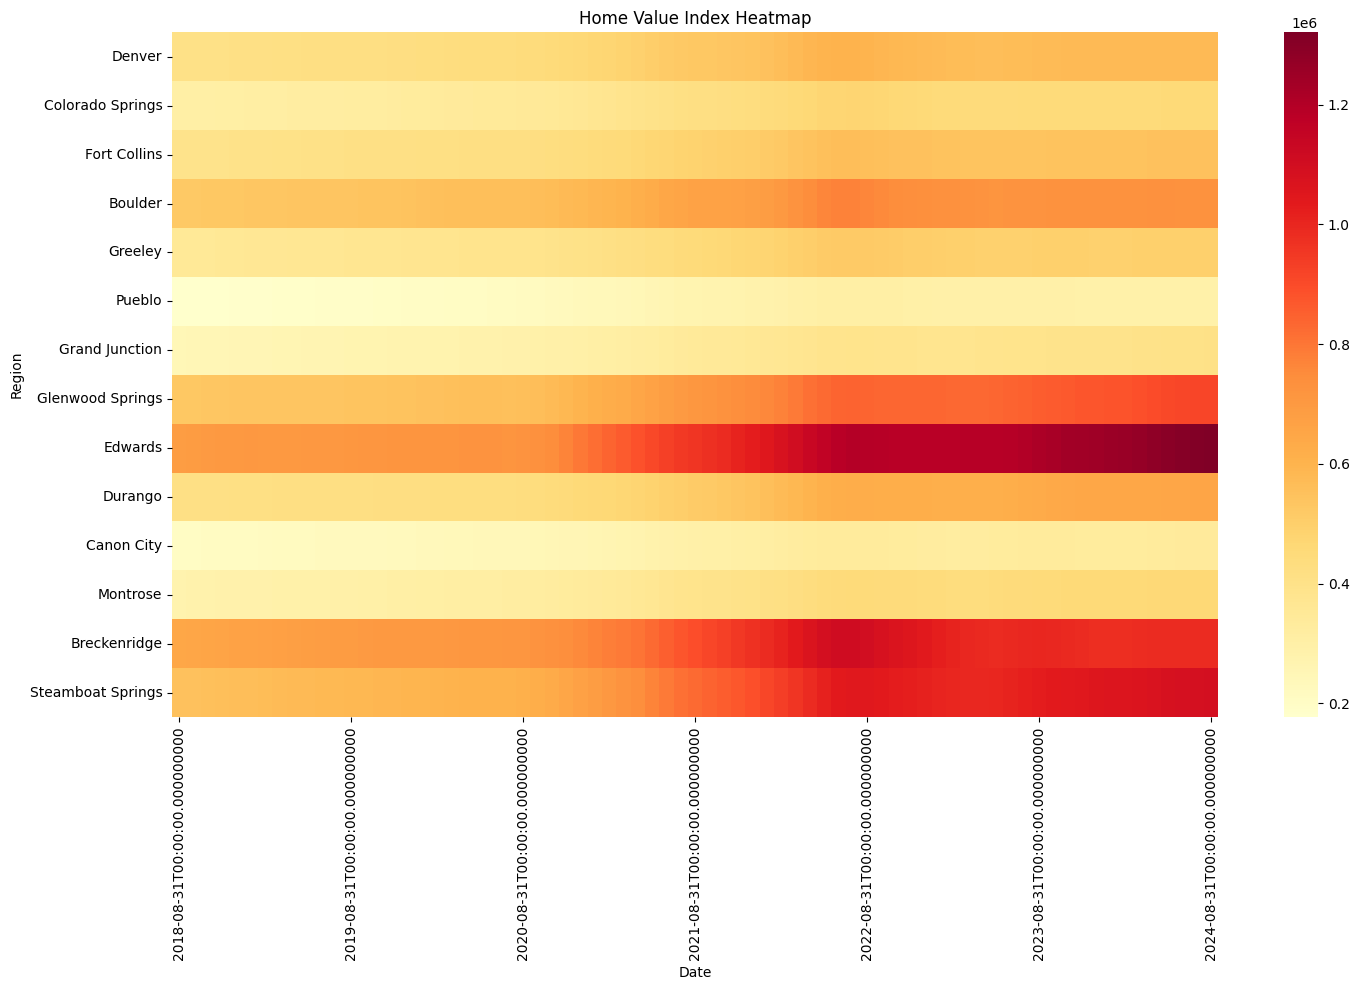

In [12]:
# First, create the date range
date_range = create_date_range()

# 1. Plot all metrics for a specific region
plot_region_metrics(df, 'Boulder', date_range)
plt.show()

# 2. Compare home values across top 5 regions
plot_metric_comparison(df, 'home_value_index', top_n=5, date_range=date_range)
plt.show()

# 3. Visualize growth rates
calculate_growth_rates(df, 'median_sale_price', date_range)
plt.show()

# 4. Create a heatmap
create_heatmap(df, 'home_value_index', date_range)
plt.show()